In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Chemicals_logistic/Logistic_X_Train.csv")
dfy = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Chemicals_logistic/Logistic_Y_Train.csv")

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [5]:
print(X)

[[ 1.         -1.23937466  0.74910149 -0.52851491]
 [ 1.         -1.03607028  0.80143631 -1.28371152]
 [ 1.         -0.61557914  1.57952053 -1.39192706]
 ...
 [ 1.          0.08827657  1.63878904 -2.19364056]
 [ 1.          1.52515501  0.85923429  1.50530791]
 [ 1.         -0.97981744  0.56395376 -1.53939416]]


In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [8]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += Y[i]*np.log2(y_hat) + (1-Y[i])*np.log2(1-y_hat)
    return -total_error/m

In [22]:
def get_grad(Y,X,theta):
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (-Y[i] + y_hat)*x
    return grad/m

In [23]:
def gradientDescent(X,Y,learning_rate = 0.5):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(200):
        theta = theta - learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
    return theta,error_list
        

In [24]:
theta,error_list = gradientDescent(X,Y)

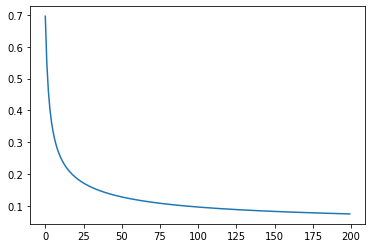

In [25]:
plt.plot(error_list)

In [31]:
test = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Chemicals_logistic/Logistic_X_Test.csv")
test = test.values
ones = np.ones((test.shape[0],1))
test = np.hstack((ones,test))
print(test)

[[ 1.         -0.76750773 -0.2618595  -2.51483147]
 [ 1.         -1.24165258  1.44900144 -0.4130893 ]
 [ 1.          1.92527007  1.93176097  1.34261917]
 ...
 [ 1.         -1.18696873  0.94734729 -0.78638597]
 [ 1.         -0.53232395  1.84516978 -0.9935503 ]
 [ 1.          0.54023217  0.58099406  0.38664901]]


In [32]:
def predict(X_test,theta):
    out = hypothesis(X_test,theta)
    for i in range(out.shape[0]):
        if out>0.5:
            return("1")
        else:
            return("0")

In [33]:
Y_Pred = np.array([predict(test[i],theta) for i in range(test.shape[0])])

In [36]:
y =  pd.DataFrame(data=Y_Pred,columns=["label"]) 
y.to_csv("Chemicals.csv",index = False)